In [57]:
import pickle

with open("DATA_seconds_bal_xy_tt.pkl", "rb") as f:
    x_train, x_test, y_train, y_test, classes = pickle.load(f)

In [58]:
import numpy as np
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [59]:
import matplotlib.pyplot as plt
def plotaccloss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(14, 6))

    # Plotting training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r*-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler

# Standardize the input data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [61]:
nout=len(classes)

In [62]:
from keras.models import Sequential
from keras.layers import Input,Dense, LSTM, Bidirectional, Reshape, GRU,Dropout,BatchNormalization

# Define the model
model = Sequential()
model.add(Input(shape=(15360,)))
model.add(Reshape((30, 512)))

# LSTM layers
# model.add(Bidirectional(LSTM(256)))
model.add(LSTM(256))

# Dense layer
model.add(Dense(32, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(0.2))

model.add(Dense(nout, activation='softmax'))

if nout==2:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarize the model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_10 (Reshape)            │ (None, 30, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,779 (3.04 MB)

 Trainable params: 795,779 (3.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5118 - loss: 6.1355 - val_accuracy: 0.6000 - val_loss: 3.8031
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6370 - loss: 3.1907 - val_accuracy: 0.5707 - val_loss: 1.9984
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6826 - loss: 1.6218 - val_accuracy: 0.5333 - val_loss: 1.2313
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5999 - loss: 1.0971 - val_accuracy: 0.6053 - val_loss: 1.0043
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6629 - loss: 0.9452 - val_accuracy: 0.6747 - val_loss: 0.9457
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7342 - loss: 0.8551 - val_accuracy: 0.7013 - val_loss: 0.8833
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7682 - loss: 0.7925 - val_accuracy: 0.7013 - val_loss: 0.8679
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7842 - loss: 0.7358 - val_accuracy: 0.6827 - v

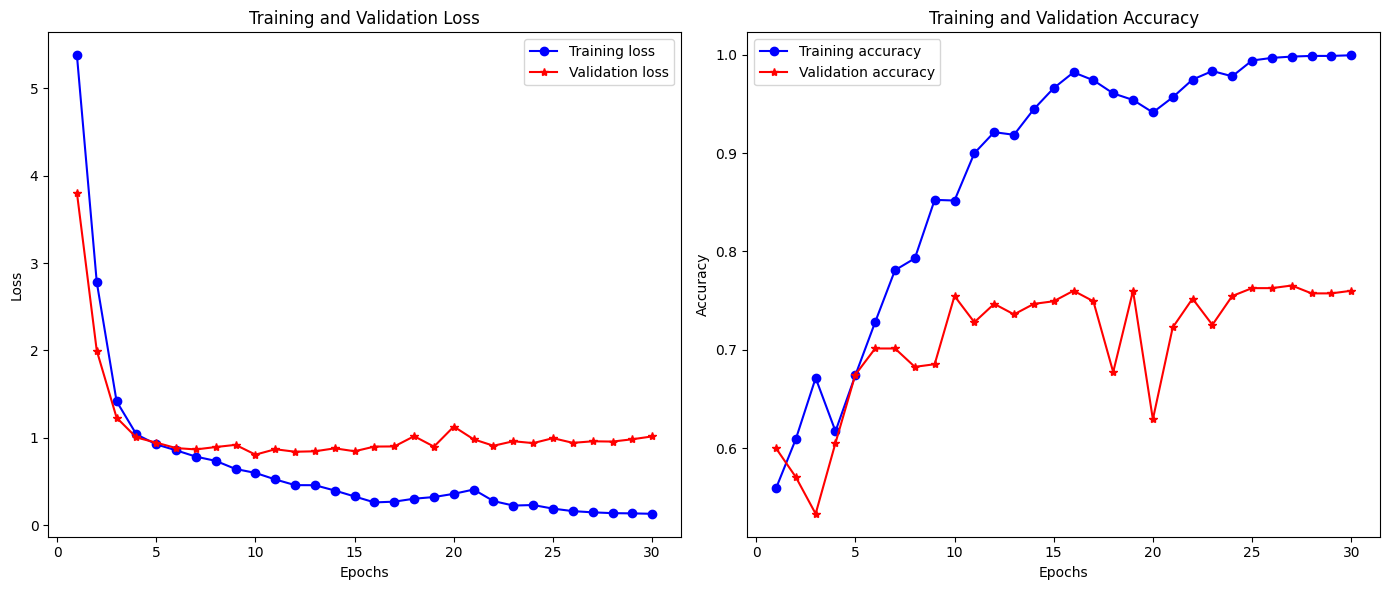

In [53]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)
plotaccloss(history)

In [54]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7636 - loss: 0.9553
Test Accuracy: 0.7543


In [55]:
y_pred_prob = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<Figure size 1000x800 with 0 Axes>

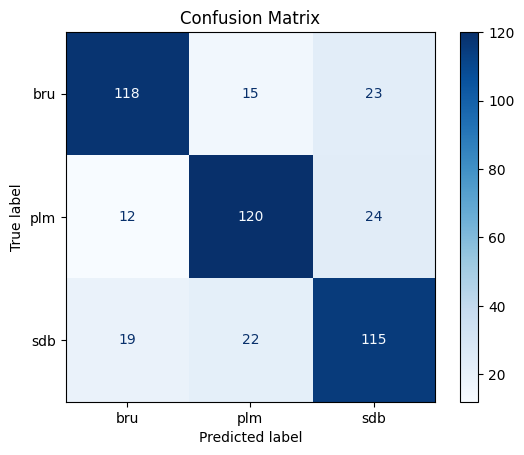

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()